# Guided Project: Stochastic Gradient Descent on Linear Regression

Solution notebook can be referenced [here](https://github.com/dataquestio/solutions/blob/master/Mission750Solutions.ipynb).

## Stochastic Gradient Descent on Linear Regression

For this exercise, imagine you like to go to the gym; however, you hate getting to the gym and finding that it is so crowded that you must wait to use the machines you want.

Luckily, you have all the skills and knowledge to build a model that will help you predict the best time to go to the gym and avoid crowds, so you can enjoy a great workout with minimal wait times and no crowds.

Your task is to use the ***Crowdedness at the Campus Gym*** dataset, which contains historic information about how crowded the campus gym is on a given day and hour, as well as other specific information about the specific days.

* Use the `Pandas` library to load the dataset into a DataFrame, run exploratory data analysis, and clean the dataset for training a model.

* After cleaning the set, split the data into training and testing sets.

* Then, you will use the `SDGRegressor` from the `Scikit Learn` library to build and train a stochastic gradient descent linear regression model to predict how many people are at the gym on a given day from the features inputed.

* Finally, you will evaluate the model and visualize the results using `matplotlib`.

## Import Libraries and Load the Data

This dataset contains over 60,000 observations about how many people were at the gym on a particular day and time. It contains 11 columns that contain the following information.

- `number_people`: this is the number of people at the gym at each observation. This will be our target variable or label.
- `date`: a string value with the specific date and time information.
- `timestamp`: an integer (int), with the number of seconds since the start of the day (00:00).
- `dayofweek`: an integer (int). 0 is equal to Monday and 6 is equal to Sunday.
- `is_weekend`: a Boolean value defining if this observation happened during a weekend. 1 for yes, 0 for no.
- `is_holiday`: a Boolean value defining if the observation happened during a holiday. 1 for yes, 0 for no.
- `temperature`: a float, defining the temperature during the day of the observation in Fahrenheit.
- `isstartof_semester`: a Boolean defining if the observation happened in the first 2 weeks of a semester. 1 for yes, 0 for no.
- `is_during_semester`: a Boolean defining if the observation happened during the active semester. 1 for yes, 0 for no.
- `month`: an integer (int) defining the month of the year. 1 is equal to January, 12 is equal to December.
- `hour`: an integer (int) for the hour of the day from 0 to 23.

In [1]:
## Load package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
## load dataset

gym = pd.read_csv('crowdness_gym_data.csv', parse_dates = ['date'])
gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [4]:
gym.describe(include = 'all')

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
unique,NaN,62184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-08-14 17:00:11-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,29.072543,NaN,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,NaN,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,NaN,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,NaN,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,NaN,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000


## EDA and Cleaning the Data

In [5]:
## No missing values found

gym.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

<AxesSubplot:>

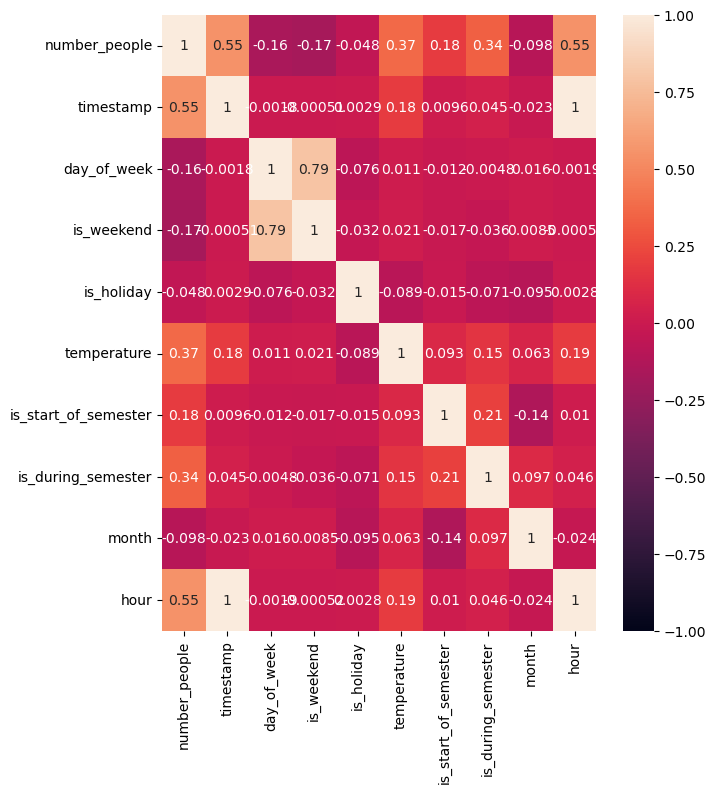

In [6]:
## Explore correlations

corrs = gym.corr()
plt.figure(figsize = (7,8))
sns.heatmap(corrs, annot = True, vmax = 1, vmin = -1)

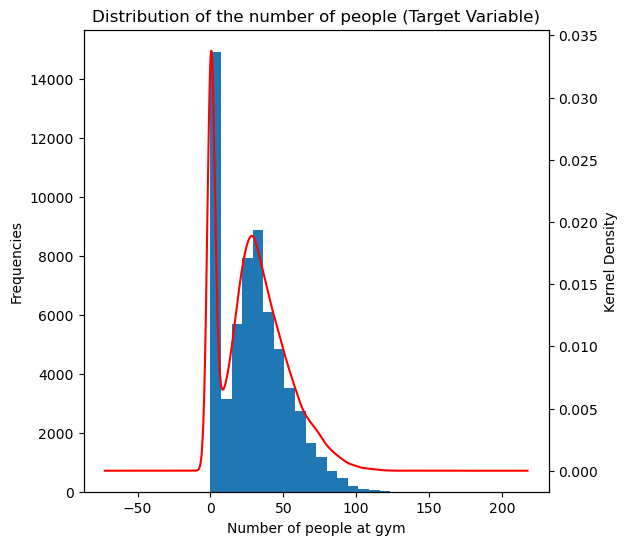

In [7]:
## Check the distribution of y first 

fig, ax1 = plt.subplots(figsize = (6,6))

gym['number_people'].plot.hist(bins = 20, ax = ax1)
ax1.set_ylabel('Frequencies')

ax2 = ax1.twinx()
gym['number_people'].plot.kde(ax = ax2, c = 'red')
ax2.set_ylabel('Kernel Density')

ax1.set_xlabel('Number of people at gym')
ax1.set_title('Distribution of the number of people (Target Variable)')
plt.show()

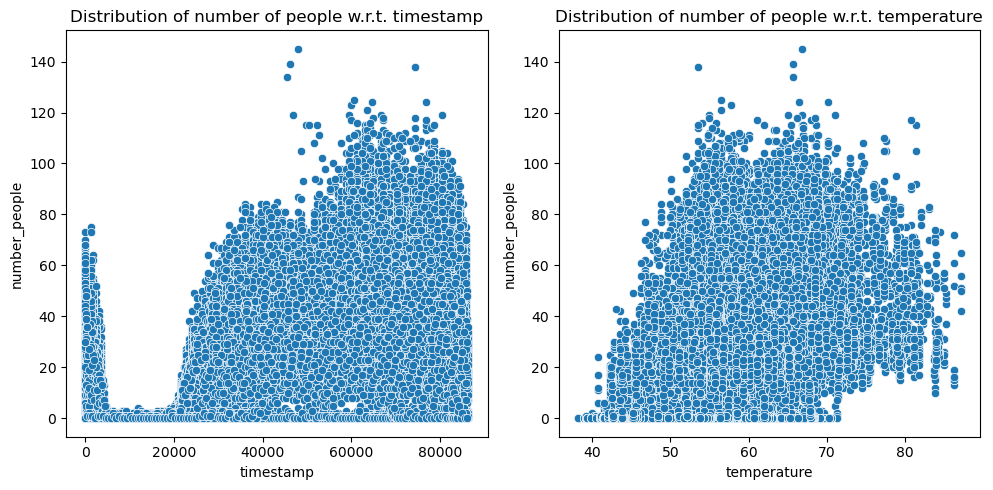

In [8]:
## Check the distribution w.r.t. two continuous variables

numerical_vars = ['timestamp', 'temperature']

plt.figure(figsize = (10,5))
for i, var in enumerate(numerical_vars):
    
    plt.subplot(1,2,i+1)
    sns.scatterplot(data = gym, x = var, y = 'number_people')
    plt.title(f'Distribution of number of people w.r.t. {var}')
    
    plt.tight_layout()

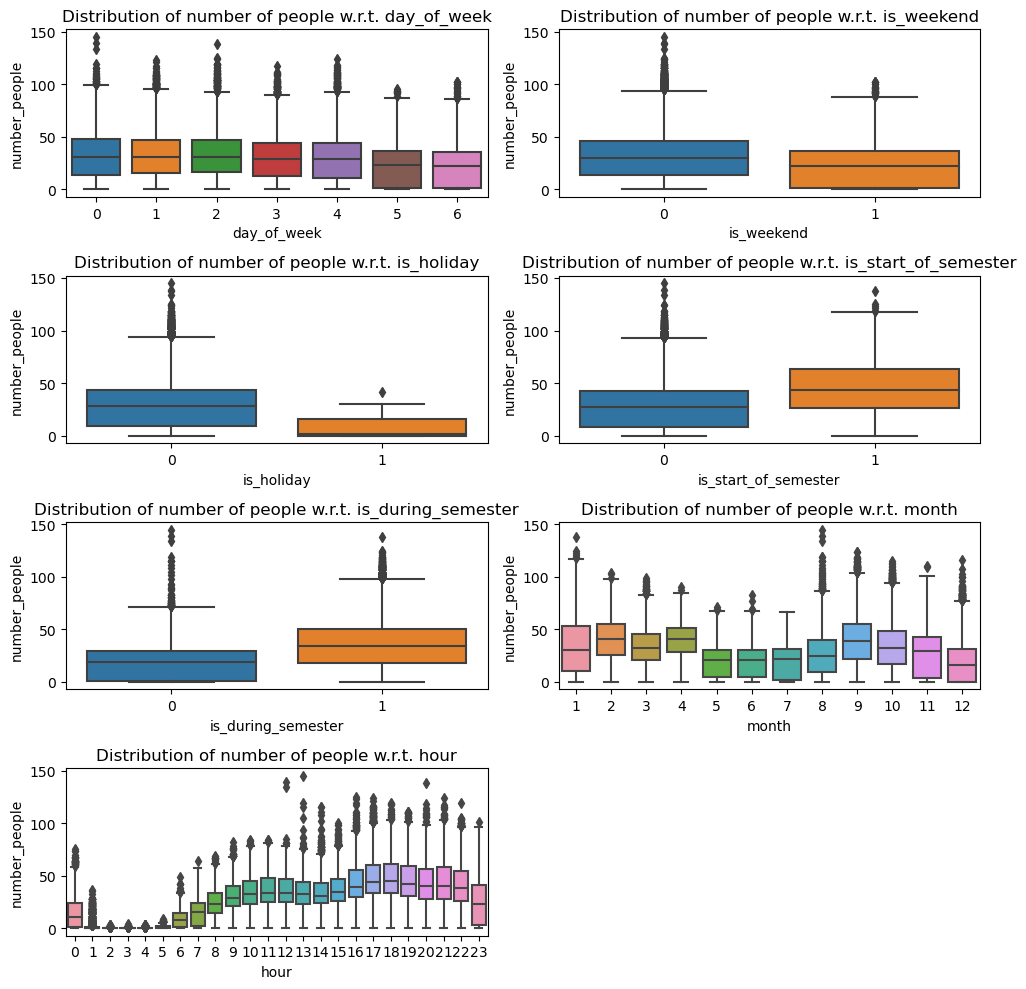

In [9]:
## Check the distribution w.r.t. a few categorical variables

categorcial_vars = ['day_of_week', 'is_weekend','is_holiday','is_start_of_semester','is_during_semester', 'month', 'hour']

plt.figure(figsize = (10,10))
for i, var in enumerate(categorcial_vars):
    
    plt.subplot(4,2,i+1)
    sns.boxplot(data = gym, x = var, y = 'number_people')
    plt.title(f'Distribution of number of people w.r.t. {var}')
    
    plt.tight_layout()

Exploratory analysis of the dataset indicated that:

* The distribution of `number_people` appeared to be bimodal, with a high frequency of low values close to `0` and a nearly symmetrical part centered around `30`.
* Correlation matrix suggested that `timestamp`, `hour`, `temperature` and `is_during_semester` were the most important features correlated with `number_people`. 
* Variable `timestamp` was measured throughout the day so was redundant comparing to `hour`. 
* Other categorical variables also impacted the distribution of `number_people` to different extents, like `is_weekend` and 
`is_holiday`.
* Variable `date` did not offer much additional information and was not numeric type.

Therefore, we decided to 

* Drop `date` and `timestamp` from feature space
* Keep the rest features as is

In [10]:
X = gym.drop(['number_people', 'date', 'timestamp'], axis = 1)
y = gym['number_people'].copy()

X.head()

,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,4,0,0,71.76,0,0,8,17
1,4,0,0,71.76,0,0,8,17
2,4,0,0,71.76,0,0,8,17
3,4,0,0,71.76,0,0,8,17
4,4,0,0,71.76,0,0,8,17


## Preparing to Build Our Model

In [11]:
## Using a 80/20 train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape[0], X_test.shape[0])

49747 12437


In [12]:
## Normalize features using standard scaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
## Train with unscaled data

sgdr_1 = SGDRegressor(eta0 = 0.0001, learning_rate = 'invscaling', random_state = 10)  
sgdr_1.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, random_state=10)

In [14]:
## Train with scaled data

sgdr_2 = SGDRegressor(eta0 = 0.0001, learning_rate = 'invscaling', random_state = 10) 
sgdr_2.fit(X_train_scaled, y_train)

SGDRegressor(eta0=0.0001, random_state=10)

##  Measure the Performance of the Model

In [15]:
def model_metric_printer(y_true, y_pred):
  
    print(f'Mean Square Error: {mean_squared_error(y_true, y_pred) :.4f}\n',
          f'Rooted Mean Square Error: {mean_squared_error(y_true, y_pred, squared = False) :.4f}\n',
          f'Mean Absolute Error: {mean_absolute_error(y_true, y_pred) :.4f}\n', 
          f'R2 Score: {r2_score(y_true, y_pred) :.4f}')


In [16]:
## Model with unscaled data

y_pred_1 = sgdr_1.predict(X_test)
print('Training without scaling:\n')
model_metric_printer(y_test, y_pred_1)

Training without scaling:

Mean Square Error: 274.2618
 Rooted Mean Square Error: 16.5609
 Mean Absolute Error: 12.5976
 R2 Score: 0.4786


In [17]:
## Model with scaled data

y_pred_2 = sgdr_2.predict(X_test_scaled)
print('Training with scaling:\n')
model_metric_printer(y_test, y_pred_2)

Training with scaling:

Mean Square Error: 259.9420
 Rooted Mean Square Error: 16.1227
 Mean Absolute Error: 12.2766
 R2 Score: 0.5058


There was only minor improvement when the features were standardized. This, however depends on the initial learning rate chosen:

In [18]:
eta0_list = [1, 1e-1, 1e-2, 1e-3, 1e-4]

for eta0 in eta0_list:
    
    print(f'For an initial learning rate of {eta0}\n')
    
    ## Train with unscaled data
    sgdr_1 = SGDRegressor(eta0 = eta0, learning_rate = 'invscaling', random_state = 10)  
    sgdr_1.fit(X_train, y_train)

    ## Train with scaled data
    sgdr_2 = SGDRegressor(eta0 = eta0, learning_rate = 'invscaling', random_state = 10) 
    sgdr_2.fit(X_train_scaled, y_train)
    
    print('Training without scaling:\n')

    ## Model with unscaled data
    y_pred_1 = sgdr_1.predict(X_test)
    model_metric_printer(y_test, y_pred_1)
    
    print('Training with scaling:\n')

    ## Model with scaled data
    y_pred_2 = sgdr_2.predict(X_test_scaled)
    model_metric_printer(y_test, y_pred_2)

For an initial learning rate of 1

Training without scaling:

Mean Square Error: 640828570516119067729854464.0000
 Rooted Mean Square Error: 25314592047199.1641
 Mean Absolute Error: 24458422108789.6758
 R2 Score: -1218254556027613794533376.0000
Training with scaling:

Mean Square Error: 20046235991738748502016.0000
 Rooted Mean Square Error: 141584730785.9811
 Mean Absolute Error: 8173228559.9209
 R2 Score: -38109128481071947776.0000
For an initial learning rate of 0.1

Training without scaling:

Mean Square Error: 1303344780591753420865536.0000
 Rooted Mean Square Error: 1141641266156.6475
 Mean Absolute Error: 1038663903613.5396
 R2 Score: -2477738649748256063488.0000
Training with scaling:

Mean Square Error: 261.9232
 Rooted Mean Square Error: 16.1840
 Mean Absolute Error: 12.3473
 R2 Score: 0.5021
For an initial learning rate of 0.01

Training without scaling:

Mean Square Error: 292.8821
 Rooted Mean Square Error: 17.1138
 Mean Absolute Error: 12.6994
 R2 Score: 0.4432
Training 

## Visualize the Results

Mean Square Error: 259.9420
 Rooted Mean Square Error: 16.1227
 Mean Absolute Error: 12.2766
 R2 Score: 0.5058


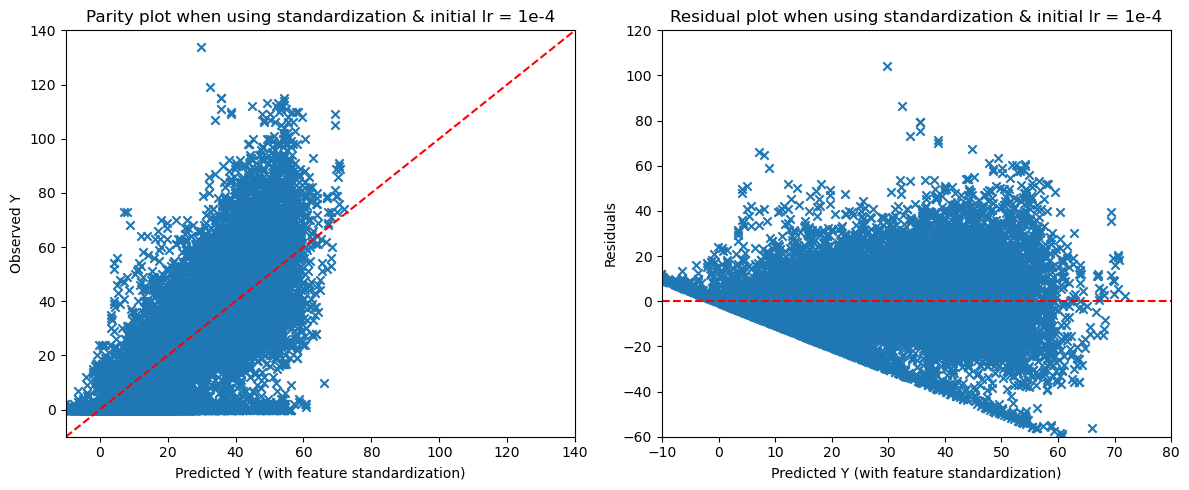

In [19]:
## Re-train while choose scaling + lr = 1e-4
sgdr_2 = SGDRegressor(eta0 = 0.0001, learning_rate = 'invscaling', random_state = 10) 
sgdr_2.fit(X_train_scaled, y_train)

y_pred_2 = sgdr_2.predict(X_test_scaled)
model_metric_printer(y_test, y_pred_2)

## Plot parity & residual

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.scatter(y_pred_2, y_test, marker = 'x')
plt.axline((0,0), slope = 1, c = 'red', linestyle = '--')
plt.xlim(-10,140)
plt.xlabel('Predicted Y (with feature standardization)')
plt.ylim(-10,140)
plt.ylabel('Observed Y')
plt.title('Parity plot when using standardization & initial lr = 1e-4')

plt.subplot(1,2,2)
plt.scatter(y_pred_2, y_test-y_pred_2, marker = 'x')
plt.axhline(0, c = 'red', linestyle = '--')
plt.xlim(-10,80)
plt.xlabel('Predicted Y (with feature standardization)')
plt.ylim(-60,120)
plt.ylabel('Residuals')
plt.title('Residual plot when using standardization & initial lr = 1e-4')

plt.tight_layout()

In [20]:
pd.DataFrame(sgdr_2.coef_.reshape(1,8), columns = X_train.columns.to_list())

,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,-1.787863,-2.356619,-0.607379,5.476083,1.816504,5.987391,-2.686489,11.146738


In [21]:
sgdr_2.intercept_

array([29.08821106])